<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/main/Class_DICOM_Version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Google CoLab Instructions

You MUST run the following code cell to get credit for this class lesson. By running this code cell, you will map your GDrive to /content/drive and print out your Google GMAIL address. Your Instructor will use your GMAIL address to verify the author of this class lesson.

In [ ]:
# You must run this cell first
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    Colab = True
    print("Note: Using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("**WARNING**: Your GMAIL address was **not** printed in the output below.")
    print("**WARNING**: You will NOT receive credit for this lesson.")
    Colab = False

Mounted at /content/drive
Note: Using Google CoLab
david.senseman@gmail.com


## Accelerated Run-time Check

You MUST run the following code cell to get credit for this class lesson. The code in this cell checks what hardware acceleration you are using. To run this lesson, you must be running a Graphics Processing Unit (GPU).

In [ ]:
# You must run this cell second

import tensorflow as tf

# ------------------------------------------------------------------------
# 0️⃣  Create check_device() function
# ------------------------------------------------------------------------

def check_device():
    # Check for available devices
    devices = tf.config.list_physical_devices()

    # Initialize device flags
    cpu = False
    gpu = False
    tpu = False

    # Check device types
    for device in devices:
        if device.device_type == 'CPU':
            cpu = True
        elif device.device_type == 'GPU':
            gpu = True
        elif device.device_type == 'TPU':
            tpu = True

    # Output device status
    if tpu:
        print("Running on TPU")
        print("WARNING: You must run this assigment using a GPU to earn credit")
        print("Change your RUNTIME now!")
    elif gpu:
        print("Running on GPU")
        gpu_info = !nvidia-smi
        gpu_info = '\n'.join(gpu_info)
        print(gpu_info)
        print("You are using a GPU hardware accelerator--You're good to go!")
    elif cpu:
        print("Running on CPU")
        print("WARNING: You must run this assigment using a GPU to earn credit")
        print("Change your RUNTIME now!")
    else:
        print("No compatible device found")
        print("WARNING: You must run this assigment using either a GPU or a TPU to earn credit")
        print("Change your RUNTIME now!")

# ------------------------------------------------------------------------
# 1️⃣  Call function
# ------------------------------------------------------------------------

check_device()

Running on GPU
Tue Sep 23 14:58:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-80GB          Off |   00000000:00:05.0 Off |                    0 |
| N/A   31C    P0             53W /  400W |       5MiB /  81920MiB |      0%      Default |
|                                         |                        |             Disabled |
+--------------------------------

If you current `Runtime` is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_05/class_05_4_image11A.png)

However, if you received this warning message

![__](https://biologicslab.co/BIO1173/images/class_05/class_05_4_image14A.png)

You **MUST** go back and change your `Runtime` **NOW** before you continue.

## **Download and Extract Data**

In [ ]:
# Example

from pathlib import Path
import requests
import zipfile
import sys
import shutil

# ------------------------------------------------------------------
# Configuration – change only if you want a different URL / filename
# ------------------------------------------------------------------
URL = "https://biologicslab.co/BIO1173/data/"
ZIP_FILENAME = "pna_data.zip"

# ------------------------------------------------------------------
# Download the zip file (streamed, so it works with large files)
# ------------------------------------------------------------------
def download_zip(url: str, dest: Path, chunk_size: int = 8192) -> None:
    """Download a file from `url` and write it to `dest`."""
    print(f"Downloading {ZIP_FILENAME} to {dest}...", end='')
    try:
        with requests.get(url, stream=True, timeout=30) as r:
            r.raise_for_status()           # will raise for 4xx/5xx
            with dest.open("wb") as f_out:
                for chunk in r.iter_content(chunk_size=chunk_size):
                    if chunk:               # filter out keep‑alive new chunks
                        f_out.write(chunk)
    except requests.exceptions.RequestException as exc:
        print(f"[ERROR] Download failed: {exc}", file=sys.stderr)
        raise


# ------------------------------------------------------------------
# Un‑zip the downloaded archive into a *named* directory
# ------------------------------------------------------------------
def unzip_file(zip_path: Path, extract_to: Path) -> None:
    """Extract all members of `zip_path` into `extract_to`."""
    print(f"Unzipping {ZIP_FILENAME} to {extract_to}...", end='')
    try:
        with zipfile.ZipFile(zip_path, "r") as zf:
            # `zipfile` preserves the original relative paths inside the
            # archive, so files will land exactly where they were stored
            # when the archive was created.
            zf.extractall(extract_to)
    except zipfile.BadZipFile as exc:
        print(f"[ERROR] {zip_path} is not a valid zip archive: {exc}", file=sys.stderr)
        raise


# ------------------------------------------------------------------
# Optional – delete the zip after extraction
# ------------------------------------------------------------------
def clean_up_zip(zip_path: Path) -> None:
    """Delete the zip file – only if you no longer need it."""
    try:
        zip_path.unlink()
        print(f"Removed temporary archive: {zip_path}...", end='')
    except OSError as exc:
        print(f"[WARNING] Could not delete {zip_path}: {exc}")


# ------------------------------------------------------------------
# Main routine
# ------------------------------------------------------------------
def main() -> None:
    cwd          = Path.cwd()            # current working directory
    zip_path     = cwd / ZIP_FILENAME
    extract_dir  = cwd / zip_path.stem   # e.g. <cwd>/pna_data

    # Ensure the extraction directory exists
    extract_dir.mkdir(parents=True, exist_ok=True)

    # Download
    download_zip(URL+ZIP_FILENAME, zip_path)
    print("done")

    # Un‑zip
    unzip_file(zip_path, extract_dir)
    print("done")

    # Clean‑up the downloaded archive
    clean_up_zip(zip_path)
    print("done")

    print(f"Files have been extracted to {extract_dir}")


# ------------------------------------------------------------------
if __name__ == "__main__":
    main()


Unzipping pna_data.zip to /content/pna_data...done
Removed temporary archive: /content/pna_data.zip...done
Files have been extracted to /content/pna_data


### Install packages

In [ ]:
!pip install pydicom

## **Process DICOM Files**

In [ ]:
# Example

import os
import warnings
from pathlib import Path
from typing import Tuple, Optional

import numpy as np
import pandas as pd
import pydicom
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# -------------------------------------------------------------
#  Global settings
# -------------------------------------------------------------
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# -------------------------------------------------------------
#  Helper: read a single DICOM file
# -------------------------------------------------------------
def read_dicom_file(file_path: str):
    """Read a DICOM file and extract image data + basic metadata."""
    try:
        ds = pydicom.dcmread(file_path)

        # Basic metadata
        metadata = {
            'filename': os.path.basename(file_path),
            'patient_name': getattr(ds, 'PatientName', 'Unknown'),
            'patient_id': getattr(ds, 'PatientID', 'Unknown'),
            'study_date': getattr(ds, 'StudyDate', 'Unknown'),
            'study_time': getattr(ds, 'StudyTime', 'Unknown'),
            'modality': getattr(ds, 'Modality', 'Unknown'),
            'manufacturer': getattr(ds, 'Manufacturer', 'Unknown'),
            'institution_name': getattr(ds, 'InstitutionName', 'Unknown'),
            'series_description': getattr(ds, 'SeriesDescription', 'Unknown'),
            'bits_allocated': getattr(ds, 'BitsAllocated', 'Unknown'),
            'rows': getattr(ds, 'Rows', 'Unknown'),
            'columns': getattr(ds, 'Columns', 'Unknown'),
            'pixel_spacing': getattr(ds, 'PixelSpacing', 'Unknown')
        }

        # Image data
        if hasattr(ds, 'pixel_array'):
            image_array = ds.pixel_array

            # Normalise to 0‑255 if needed
            if image_array.dtype != np.uint8:
                image_array = ((image_array - image_array.min()) /
                               (image_array.max() - image_array.min()) * 255).astype(np.uint8)

            metadata['image_available'] = True
            metadata['image_shape'] = image_array.shape
        else:
            metadata['image_available'] = False
            metadata['image_shape'] = 'No image data'

        return ds, metadata

    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return None, None

# -------------------------------------------------------------
#  Helper: fast drop‑check
# -------------------------------------------------------------
def is_file_dropped(file_path: str) -> bool:
    """
    Quick guard that tells us whether a DICOM file is already
    missing / unreadable.
    """
    if not os.path.isfile(file_path):
        return True

    if os.path.getsize(file_path) == 0:
        return True

    try:
        pydicom.dcmread(file_path, stop_before_pixels=True)
    except Exception:
        return True

    return False

# -------------------------------------------------------------
#  Load & preprocess – merge CSVs, keep only valid DICOM rows
# -------------------------------------------------------------
def load_and_preprocess_data(
    data_dir: str = '.',
    max_samples: int | None = None,
    log_dropped: bool = True
):

    # Load the two CSVs, merge on patient ID, and keep only rows
    # that have an intact DICOM image.
    try:
        info_df   = pd.read_csv(os.path.join(data_dir, 'pna_detailed_class_info.csv'))
        labels_df = pd.read_csv(os.path.join(data_dir, 'pna_train_labels.csv'))
    except FileNotFoundError as e:
        print(f"Error loading CSV files: {e}")
        return None, []

    # Define patient ID variable
    info_id_col   = 'patientId'
    labels_id_col = 'patientId'

    try:
        merged_df = pd.merge(info_df, labels_df, left_on=info_id_col,
                             right_on=labels_id_col, how='inner')
        #print(f"Merged DataFrame shape: {merged_df.shape}")
    except Exception as e:
        print(f"Error merging dataframes: {e}")
        return None, []

    dicom_dir = os.path.join(data_dir, 'pna_train_images')
    if not os.path.isdir(dicom_dir):
        print(f"DICOM directory not found: {dicom_dir}")
        return None, []

    valid_rows = []
    dropped_ids = []

    for idx, row in merged_df.iterrows():
        patient_id = row[info_id_col]
        dicom_file = os.path.join(dicom_dir, f"{patient_id}.dcm")

        if is_file_dropped(dicom_file):
            dropped_ids.append(patient_id)
        else:
            valid_rows.append(idx)

    filtered_df = merged_df.loc[valid_rows].copy()
    print(f"Filtered DataFrame shape (with valid DICOM files): {filtered_df.shape}")

    return filtered_df, dropped_ids

# -------------------------------------------------------------
#  Build X, y arrays – skip any DICOM that fails
# -------------------------------------------------------------
def create_dataset(
    filtered_df: pd.DataFrame,
    data_dir: str = '.',
    target_column: str = 'Target',
    verbose: bool = True,
) -> Tuple[np.ndarray, np.ndarray]:

    if filtered_df.empty:
        if verbose:
            print("Input DataFrame is empty – nothing to load.")
        return np.array([], dtype=np.uint8), np.array([], dtype=int)

    print("Creating dataset")

    # Paths ------------------------------------------------------------
    dicom_dir = os.path.join(data_dir, "pna_train_images")

    # Wrap the iterator with tqdm
    iterator = tqdm(
        filtered_df.iterrows(),
        total=len(filtered_df),
        desc="Loading DICOM Images",
        disable=not verbose
    )

    # Initialize images and labels
    images, labels = [], []

    # Define patient ID variable
    info_id_col   = 'patientId'
    labels_id_col = 'patientId'

    # Progress‑sensitive loop -----------------------------------------
    for i, (_, row) in enumerate(iterator, start=1):
        patient_id = row[info_id_col]
        dicom_file = os.path.join(dicom_dir, f"{patient_id}.dcm")

        # 1) File exists?
        if not os.path.exists(dicom_file):
            if verbose:
                tqdm.write(f"[{i}] Missing file: {patient_id}")
            continue

        # 2) Try to read the DICOM
        try:
            ds, metadata = read_dicom_file(dicom_file)
        except Exception as exc:
            if verbose:
                tqdm.write(f"[{i}] Error reading {patient_id}: {exc}")
            continue

        # 3) Does the file contain image data?
        if metadata is None or not metadata.get("image_available", False):
            if verbose:
                tqdm.write(f"[{i}] No image in {patient_id}")
            continue

        # 4) Grab the pixel array
        img = ds.pixel_array  # shape (H, W) or (H, W, 3)

        # 5) Convert grayscale to RGB
        if img.ndim == 2:
            img = np.stack([img] * 3, axis=-1)

        images.append(img.astype(np.uint8))
        labels.append(int(row[target_column]))

    # ----------------------------------------------------------------------
    # Assemble the final arrays *after* the loop finishes
    # ----------------------------------------------------------------------
    X = np.array(images, dtype=np.uint8)
    y = np.array(labels, dtype=int)

    if verbose:
        #print("\nDone")
        print(f"The number of Image files = {len(X)}")
    return X, y
# -------------------------------------------------------------
#  Show a single DICOM image (for sanity checks)
# -------------------------------------------------------------
def display_dicom_image(file_path: str, figsize: tuple = (10, 10)):
    """Show a single DICOM image with proper orientation."""
    try:
        ds = pydicom.dcmread(file_path)
        if hasattr(ds, 'pixel_array'):
            img = ds.pixel_array
            if getattr(ds, 'PhotometricInterpretation', None) == 'MONOCHROME1':
                img = np.max(img) - img

            plt.figure(figsize=figsize)
            plt.imshow(img, cmap='gray')
            plt.title(ds.SOPClassUID)
            plt.axis('off')
            plt.show()
        else:
            print("This DICOM has no pixel data.")
    except Exception as e:
        print(f"Failed to display {file_path}: {e}")

# -------------------------------------------------------------
#  Main block – run the whole pipeline
# -------------------------------------------------------------
if __name__ == "__main__":
    # --- 1️⃣ Path to the data root --------------------------------
    data_root = os.path.join('.', 'pna_data')



In [ ]:
# -------------------------------------------------------------
#  Visualise class / target distributions
# -------------------------------------------------------------
def visualize_data_distribution(filtered_df: pd.DataFrame):
    if filtered_df is None:
        return

    plt.figure(figsize=(12, 6))

    # Class distribution
    plt.subplot(1, 2, 1)
    if 'class' in filtered_df.columns:
        class_counts = filtered_df['class'].value_counts()
        class_counts.plot(kind='bar')
        plt.title('Class Distribution')
        plt.ylabel('Count')
    else:
        plt.text(0.5, 0.5, 'No class column found', ha='center')
        plt.title('Class Distribution')

    # Target distribution
    plt.subplot(1, 2, 2)
    if 'Target' in filtered_df.columns:
        target_counts = filtered_df['Target'].value_counts()
        target_counts.plot(kind='bar')
        plt.title('Target Distribution')
        plt.ylabel('Count')
    else:
        plt.text(0.5, 0.5, 'No Target column found', ha='center')
        plt.title('Target Distribution')

    plt.tight_layout()
    plt.show()

Filtered DataFrame shape (with valid DICOM files): (9337, 7)


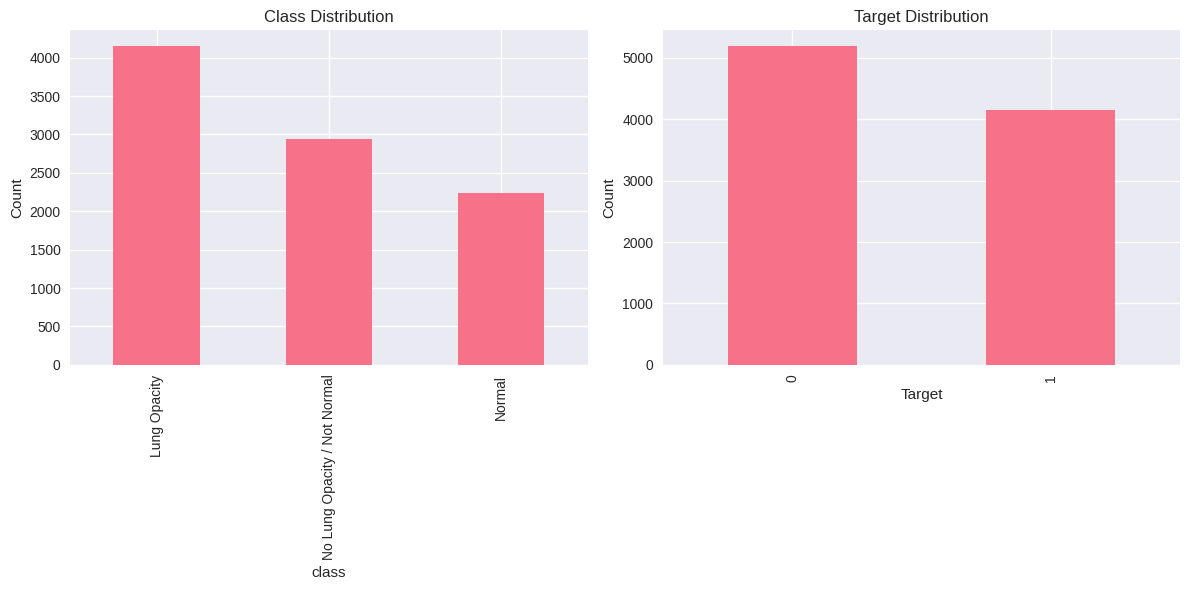

In [ ]:
# Example

# Load & merge, keep only valid DICOM rows
filtered_df, _ = load_and_preprocess_data(data_dir=data_root, max_samples=None)

# Visualise the data
visualize_data_distribution(filtered_df)


### **Build Dataset**

In [ ]:
# Example

# Use the whole dataset
filtered_df, _ = load_and_preprocess_data(data_dir=data_root, max_samples=None)

# Build X, y
X, y = create_dataset(filtered_df, data_dir=data_root, target_column='Target')


Filtered DataFrame shape (with valid DICOM files): (9337, 7)
Creating dataset


Loading DICOM Images: 100%|██████████| 9337/9337 [01:19<00:00, 118.06it/s]


The number of Image files = 9337


In [ ]:
# Build ResNet101

# ------------------------------------------
# Imports
# ------------------------------------------
import os
import time
from pathlib import Path
from typing import Tuple, Optional, Callable, Any
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, models


# ------------------------------------------
# Dataset wrapper
# ------------------------------------------
class DicomDataset(Dataset):
    def __init__(
        self,
        X: np.ndarray,
        y: np.ndarray,
        transform: Optional[Callable] = None
    ):
        assert X.ndim == 4, f"X must be (N, H, W, C) but got shape {X.shape}"
        assert y.ndim == 1, f"y must be 1‑D but got shape {y.shape}"
        assert X.shape[0] == y.shape[0], "X and y must have the same number of samples"

        self.X = X
        self.y = y
        self.transform = transform

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        img = self.X[idx]          # shape (H, W, 3), dtype uint8
        label = int(self.y[idx])

        # Convert to PIL Image so torchvision transforms can work
        img = transforms.ToPILImage()(img)

        if self.transform:
            img = self.transform(img)

        return img, label

# ------------------------------------------
# Helper: Build transforms
# ------------------------------------------
def get_transform(
    img_size: int = 224,
    is_train: bool = True,
    crop_size: int = 224,
    h_flip: bool = True,
    augment: bool = False
) -> Callable:
    """
    Returns a torchvision transform chain.
    """
    if is_train:
        transform = transforms.Compose([
            transforms.Resize((img_size, img_size)),
            transforms.RandomResizedCrop(crop_size) if augment else transforms.RandomCrop(crop_size),
            transforms.RandomHorizontalFlip() if h_flip else transforms.Lambda(lambda x: x),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])
    else:  # eval / test
        transform = transforms.Compose([
            transforms.Resize((img_size, img_size)),
            transforms.CenterCrop(crop_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])

    return transform


# ------------------------------------------
# Helper: Build dataloaders
# ------------------------------------------
def build_dataloaders(
    X: np.ndarray,
    y: np.ndarray,
    batch_size: int = 32,
    val_split: float = 0.2,
    seed: int = 42,
    num_workers: int = 4,
) -> Tuple[DataLoader, DataLoader]:
    """
    Returns training and validation DataLoaders.
    """
    dataset = DicomDataset(X, y, transform=get_transform(is_train=True))

    total = len(dataset)
    val_len = int(total * val_split)
    train_len = total - val_len

    torch.manual_seed(seed)
    train_ds, val_ds = random_split(dataset, [train_len, val_len])

    # Override transforms for validation
    val_ds.dataset.transform = get_transform(is_train=False)

    train_loader = DataLoader(
        train_ds,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        pin_memory=True,
    )

    val_loader = DataLoader(
        val_ds,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        pin_memory=True,
    )

    return train_loader, val_loader

# ------------------------------------------
# Training loop
# ------------------------------------------
def train_one_epoch(
    model: nn.Module,
    loader: DataLoader,
    criterion: nn.Module,
    optimizer: optim.Optimizer,
    device: torch.device,
) -> float:
    model.train()
    epoch_loss = 0.0

    for imgs, targets in tqdm(loader, desc="Training", leave=False):
        imgs, targets = imgs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * imgs.size(0)

    return epoch_loss / len(loader.dataset)

# --------------------------------------------
# Measure validation loss during training
# --------------------------------------------
def validate(
    model: nn.Module,
    loader: DataLoader,
    criterion: nn.Module,
    device: torch.device,
) -> Tuple[float, float]:
    model.eval()
    epoch_loss = 0.0
    correct = 0

    with torch.no_grad():
        for imgs, targets in tqdm(loader, desc="Validation", leave=False):
            imgs, targets = imgs.to(device), targets.to(device)

            outputs = model(imgs)
            loss = criterion(outputs, targets)

            epoch_loss += loss.item() * imgs.size(0)
            preds = outputs.argmax(dim=1)
            correct += (preds == targets).sum().item()

    val_loss = epoch_loss / len(loader.dataset)
    val_acc = correct / len(loader.dataset)
    return val_loss, val_acc

# ------------------------------------------
# Get ResNet101 model
# ------------------------------------------
def get_resnet101(
    num_classes: int,
    pretrained: bool = True,
    device: Optional[torch.device] = None,
    name: Optional[str] = None
) -> nn.Module:
    """Return a ResNet‑101 backbone.  Optionally attach a `name` attribute."""
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    backbone = models.resnet101(pretrained=pretrained)
    backbone.fc = nn.Linear(backbone.fc.in_features, num_classes)
    backbone.to(device)

    # Attach a name only if one was supplied
    if name is not None:
        backbone.name = name
    return backbone


# ------------------------------------------------------------
# Plotting routine
# ------------------------------------------------------------

def plot_and_save(history, num_epochs, batch_size):
    """
    Plots training/validation loss & accuracy and saves the figure to
    /content/drive/MyDrive/models.
    """
    # ------------------------------------------------------------
    # Plot the curves and store to Drive
    # ------------------------------------------------------------
    epochs = np.arange(1, num_epochs + 1)

    fig, ax1 = plt.subplots(figsize=(8, 5))
    ax2 = ax1.twinx()

    ax1.plot(epochs, history['train_loss'], label='train loss', color='C0')
    ax1.plot(epochs, history['val_loss'],  label='val loss',   color='C1')
    ax2.plot(epochs, history['val_acc'],   label='val acc',   color='C2')

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax2.set_ylabel('Accuracy')
    ax1.set_ylim(bottom=0)
    ax2.set_ylim(bottom=0, top=1)

    # Merge legends from both axes
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='upper left')

    plt.title('Training on GPU – loss & accuracy')
    plt.tight_layout()

    # ------------------------------
    # Save figure to Drive
    # ------------------------------
    drive.mount('/content/drive', force_remount=True)
    out_dir = Path("/content/drive/MyDrive/models")
    out_dir.mkdir(parents=True, exist_ok=True)

    fig_path = out_dir / f"gpu_train_curve_{num_epochs}e_{batch_size}b.png"
    fig.savefig(fig_path, dpi=300)
    plt.close(fig)

    print(f"Figure saved to {fig_path}")
    return history

In [ ]:
# ------------------------------------------
# 7️⃣ Example training routine
# ------------------------------------------

def run_training(
    X: np.ndarray,
    y: np.ndarray,
    num_epochs: int = 20,
    batch_size: int = 32,
    lr: float = 1e-4,
    weight_decay: float = 1e-4,
    val_split: float = 0.2,
    device: torch.device | None = None,
    model: nn.Module | None = None
) -> dict:

    # -------------------------------------------------------------
    # Device handling
    # -------------------------------------------------------------
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # -------------------------------------------------------------
    # Prepare the dataset
    # -------------------------------------------------------------
    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.long)

    # Split into train / val
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=val_split, stratify=y, random_state=42
    )

    train_ds = TensorDataset(X_train, y_train)
    val_ds   = TensorDataset(X_val,   y_val)

    batch_size = 16          # or 8 if you still hit OOM
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, pin_memory=True)
    val_loader   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False, pin_memory=True)

    # -------------------------------------------------------------
    # Model – either use the one you passed or build a fresh one
    # -------------------------------------------------------------

    """
    if model is None:
        # Example: build a ResNet‑101 with the right number of classes
        num_classes = int(y.max().item() + 1)          # 0‑based labels → +1
        model = get_resnet101(num_classes=num_classes,
                              pretrained=True,
                              device=device,
                              name=None)          # ← see next section
    """
    model.to(device)

    # -------------------------------------------------------------
    # 4️⃣ Loss, Optimiser, Scheduler
    # -------------------------------------------------------------
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(
        model.parameters(),
        lr=lr,
        weight_decay=weight_decay
    )
    scheduler = optim.lr_scheduler.CosineAnnealingLR(
        optimizer, T_max=num_epochs, eta_min=lr * 0.01
    )

    # -------------------------------------------------------------
    # 4️⃣ Lists to store metrics
    # -------------------------------------------------------------
    train_losses, val_losses, val_accs = [], [], []

    # -------------------------------------------------------------
    # 5️⃣ Epoch loop
    # -------------------------------------------------------------
    for epoch in range(1, num_epochs + 1):
        # ---- Train ------------------------------------------------
        model.train()
        running_train_loss = 0.0
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)

            optimizer.zero_grad()
            logits = model(xb)
            loss   = criterion(logits, yb)
            loss.backward()
            optimizer.step()

            running_train_loss += loss.item() * xb.size(0)   # accumulate over batch

        epoch_train_loss = running_train_loss / len(train_loader.dataset)
        train_losses.append(epoch_train_loss)

        # ---- Validation ------------------------------------------
        model.eval()
        running_val_loss = 0.0
        correct = 0
        with torch.no_grad():
            for xb, yb in val_loader:
                xb, yb = xb.to(device), yb.to(device)
                logits = model(xb)
                loss   = criterion(logits, yb)

                running_val_loss += loss.item() * xb.size(0)

                preds = torch.argmax(logits, dim=1)
                correct += (preds == yb).sum().item()

        epoch_val_loss = running_val_loss / len(val_loader.dataset)
        epoch_val_acc  = correct / len(val_loader.dataset)

        val_losses.append(epoch_val_loss)
        val_accs.append(epoch_val_acc)

        # ---- Scheduler step ---------------------------------------
        scheduler.step()

        # ---- (Optional) print progress ----------------------------
        print(f"Epoch {epoch:02d}/{num_epochs} | "
              f"train_loss={epoch_train_loss:.4f} | "
              f"val_loss={epoch_val_loss:.4f} | "
              f"val_acc={epoch_val_acc:.4f}")

    # -------------------------------------------------------------
    # 6️⃣ Build and return the history dict
    # -------------------------------------------------------------
    history = {
        "train_loss": train_losses,
        "val_loss":   val_losses,
        "val_acc":    val_accs,
    }
    return history

In [ ]:
NUM_CLASSES = len(set(y))          # y is your numpy array of labels
pna_model = get_resnet101(num_classes=NUM_CLASSES, name="pna_model")


In [ ]:
# Example

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from google.colab import drive   # only needed when you run in Colab

def plot_and_save_history(
    history: dict,
    num_epochs: int,
    batch_size: int,
    out_root: str = "/content/drive/MyDrive/models",
    title: str | None = None,
    dpi: int = 300,
) -> dict:
    """
    Plot training curves (loss & accuracy), save to Drive, and return the
    supplied history dictionary unchanged.

    Parameters
    ----------
    history : dict
        Dictionary produced by the training routine.  Must contain the
        keys:  'train_loss', 'val_loss', and 'val_acc' (each an iterable of
        length `num_epochs`).
    num_epochs : int
        Total number of epochs that were run.
    batch_size : int
        Batch size used during training (shown in the filename).
    out_root : str, optional
        Root folder in Google Drive where the figure will be stored.  The
        folder is created automatically if it does not exist.
    title : str | None, optional
        Custom title for the figure.  If None, a default title that
        includes the device type is used.
    dpi : int, optional
        Resolution of the saved PNG.

    Returns
    -------
    dict
        The same `history` object that was passed in.
    """
    # ------------------------------------------------------------------
    # 1️⃣ Plot curves
    # ------------------------------------------------------------------
    epochs = np.arange(1, num_epochs + 1)

    fig, ax1 = plt.subplots(figsize=(8, 5))
    ax2 = ax1.twinx()

    ax1.plot(epochs, history["train_loss"], label="train loss", color="C0")
    ax1.plot(epochs, history["val_loss"],   label="val loss",   color="C1")
    ax2.plot(epochs, history["val_acc"],    label="val acc",    color="C2")

    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Loss")
    ax2.set_ylabel("Accuracy")
    ax1.set_ylim(bottom=0)
    ax2.set_ylim(bottom=0, top=1)

    # Merge legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

    # Optional custom title
    if title is None:
        title = "Training on GPU – loss & accuracy"
    plt.title(title)
    plt.tight_layout()

    # ------------------------------------------------------------------
    # 2️⃣ Save figure to Drive
    # ------------------------------------------------------------------
    drive.mount("/content/drive", force_remount=True)  # works only in Colab
    out_dir = Path(out_root)
    out_dir.mkdir(parents=True, exist_ok=True)

    fig_path = out_dir / f"gpu_train_curve_{num_epochs}e_{batch_size}b.png"
    fig.savefig(fig_path, dpi=dpi)
    plt.close(fig)

    print(f"Figure saved to {fig_path}")
    return history


In [ ]:
# Example

# Define variables
EPOCHS= 20

# Train model
print(f"---Training is starting for {EPOCHS} epochs ----------")
history = run_training(
    X, y,
    num_epochs=EPOCHS,
    batch_size=16,
    lr=1e-4,
    weight_decay=1e-4,
    val_split=0.2
)


---Training is starting for 20 epochs ----------


In [ ]:
# Optional: custom title, output folder, etc.
# Now you can pass `history` into the plotting helper
history = plot_and_save_history(
    history=history,
    num_epochs=20,
    batch_size=32,
    title="PNA training on GPU – loss & accuracy",
    out_root="/content/drive/MyDrive/models",
    dpi=300
)